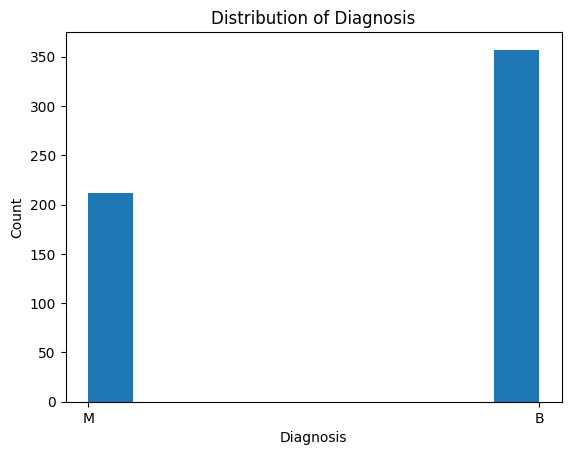

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download the dataset and load it into a DataFrame
data_url = "https://drive.google.com/uc?export=download&id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Step 2: Print the distribution graph
plt.hist(df["diagnosis"])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Diagnosis")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 3: Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data: {bit_size} bits")

# Step 4: Split the scaled data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Step 5: Train the SVM model and measure the runtime.
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

# Step 6: Predict labels for the test set and calculate the accuracy.
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 7: Print the accuracy and runtime.
print(f"Accuracy before quantization: {accuracy:.4f}")
print(f"Runtime before quantization: {runtime:.4f} seconds")


Bit size of the input data: 64 bits
Accuracy before quantization: 0.9684
Runtime before quantization: 0.0059 seconds


C = 1, Training Accuracy: 0.9824, Validation Accuracy: 0.9649, Runtime: 0.0027 seconds
C = 2, Training Accuracy: 0.9912, Validation Accuracy: 0.9474, Runtime: 0.0024 seconds
C = 3, Training Accuracy: 0.9912, Validation Accuracy: 0.9474, Runtime: 0.0024 seconds
C = 4, Training Accuracy: 0.9912, Validation Accuracy: 0.9474, Runtime: 0.0024 seconds
C = 5, Training Accuracy: 0.9912, Validation Accuracy: 0.9474, Runtime: 0.0024 seconds
C = 6, Training Accuracy: 0.9912, Validation Accuracy: 0.9474, Runtime: 0.0024 seconds
C = 7, Training Accuracy: 0.9912, Validation Accuracy: 0.9474, Runtime: 0.0024 seconds
C = 8, Training Accuracy: 0.9912, Validation Accuracy: 0.9474, Runtime: 0.0042 seconds
C = 9, Training Accuracy: 0.9912, Validation Accuracy: 0.9474, Runtime: 0.0038 seconds
C = 10, Training Accuracy: 0.9912, Validation Accuracy: 0.9474, Runtime: 0.0038 seconds
C = 11, Training Accuracy: 0.9912, Validation Accuracy: 0.9298, Runtime: 0.0036 seconds
C = 12, Training Accuracy: 0.9956, Valida

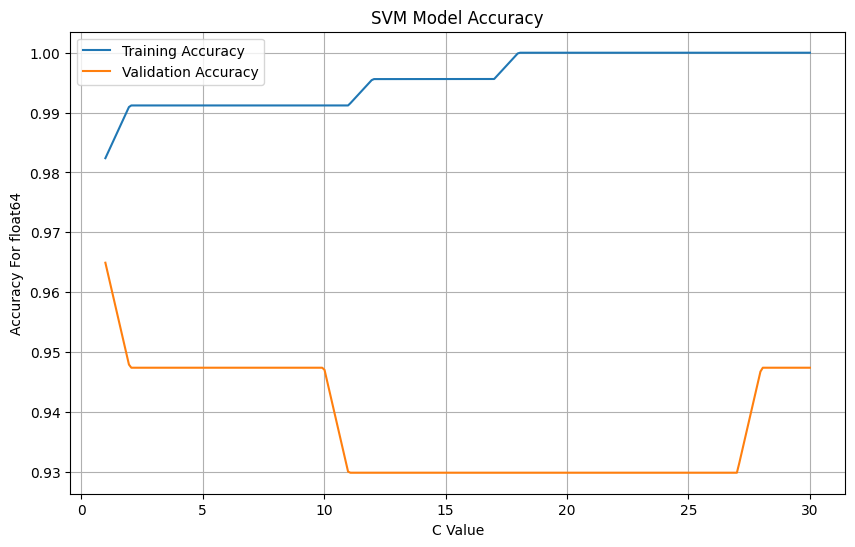

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 3: Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the scaled data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Create lists to store training and validation accuracies for each C value
C_values = np.arange(1, 31)  # Generate a range of C values from 1 to 30 (inclusive)
training_accuracies = []
validation_accuracies = []

# Loop through C values
for C_value in C_values:
    # Split the training set into smaller training set and validation set
    X_train_small, X_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train the SVM model and measure the runtime
    start_time = time.time()
    svm = SVC(C=C_value)
    svm.fit(X_train_small, y_train_small)
    end_time = time.time()
    runtime = end_time - start_time

    # Predict labels for the training and validation set
    y_train_pred = svm.predict(X_train_small)
    y_val_pred = svm.predict(X_val)

    # Calculate training and validation accuracies
    training_accuracy = accuracy_score(y_train_small, y_train_pred)
    validation_accuracy = accuracy_score(y_val, y_val_pred)

    # Append accuracies to the lists
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)

    print(f"C = {C_value}, Training Accuracy: {training_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}, Runtime: {runtime:.4f} seconds")

# Generate a smoother range of C values for interpolation
fine_C_values = np.linspace(1, 30, num=300)

# Interpolate the training and validation accuracies for the fine range of C values
interpolated_training_accuracies = np.interp(fine_C_values, C_values, training_accuracies)
interpolated_validation_accuracies = np.interp(fine_C_values, C_values, validation_accuracies)

# Plot the graph for training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(fine_C_values, interpolated_training_accuracies, label='Training Accuracy')
plt.plot(fine_C_values, interpolated_validation_accuracies, label='Validation Accuracy')
plt.xlabel('C Value')
plt.ylabel('Accuracy For float64')
plt.title('SVM Model Accuracy')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import time

data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 3: Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data: {bit_size} bits")

# Step 4: Apply quantization using Quantile Transformer
quant_transformer = QuantileTransformer(n_quantiles=32, output_distribution='uniform', ignore_implicit_zeros=False, subsample=1000, random_state=None )
X_quantized = quant_transformer.fit_transform(X_scaled)

# Print the bit size of the quantized data
quantized_bit_size = X_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data before conversion: {quantized_bit_size} bits")

# Convert the quantized data from 64-bit to 32-bit
X_quantized = X_quantized.astype(np.int32)

# Print the bit size of the quantized data after conversion
quantized_bit_size = X_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data after conversion: {quantized_bit_size} bits")

# Step 5: Split the quantized data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_quantized, y, test_size=0.9, random_state=42)

# Step 6: Train the SVM model and measure the runtime.
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

# Step 7: Predict labels for the test set and calculate the accuracy.
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 8: Print the accuracy and runtime.
print(f"Accuracy after quantization with quantile transformer: {accuracy:.4f}")
print(f"Runtime after quantization with quantile transformer: {runtime:.4f} seconds")


Bit size of the input data: 64 bits
Bit size of the quantized data before conversion: 64 bits
Bit size of the quantized data after conversion: 32 bits
Accuracy after quantization with quantile transformer: 0.6238
Runtime after quantization with quantile transformer: 0.0013 seconds


Bit size of the input data: 64 bits


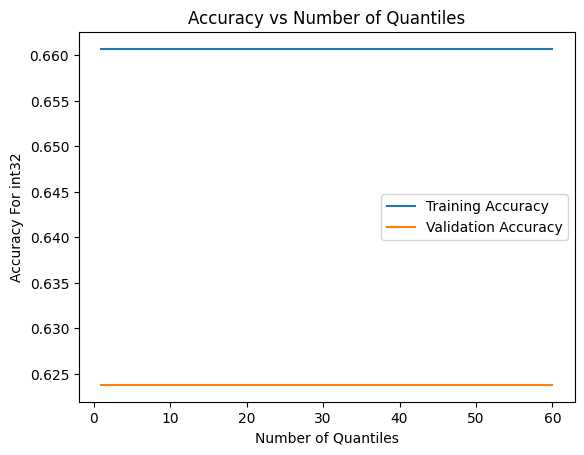

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import time
import matplotlib.pyplot as plt

data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data: {bit_size} bits")

# Define the range of quantiles
quantile_range = range(1, 61)

# Lists to store training and validation accuracy
train_accuracy_list = []
val_accuracy_list = []
quantile_list = []

for n_quantiles in quantile_range:
    # Apply quantization using Quantile Transformer
    quant_transformer = QuantileTransformer(n_quantiles=n_quantiles, output_distribution='uniform',
                                            ignore_implicit_zeros=False, subsample=1000, random_state=None)
    X_quantized = quant_transformer.fit_transform(X_scaled)

    # Convert the quantized data from 64-bit to 32-bit
    X_quantized = X_quantized.astype(np.int32)

    # Split the quantized data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_quantized, y, test_size=0.9, random_state=42)

    # Train the SVM model and measure the runtime
    start_time = time.time()
    svm = SVC()
    svm.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time

    # Predict labels for the training and validation sets
    y_pred_train = svm.predict(X_train)
    y_pred_val = svm.predict(X_test)

    # Calculate the accuracy of the model on the training and validation sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_val)

    # Append accuracy and quantile values to the lists
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    quantile_list.append(n_quantiles)

# Plot the graph
plt.plot(quantile_list, train_accuracy_list, label='Training Accuracy')
plt.plot(quantile_list, val_accuracy_list, label='Validation Accuracy')
plt.xlabel("Number of Quantiles")
plt.ylabel("Accuracy For int32")
plt.title("Accuracy vs Number of Quantiles")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 3: Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data: {bit_size} bits")

# Step 4: Split the scaled data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Step 5: Train the SVM model and measure the runtime.
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

# Step 6: Predict labels for the test set and calculate the accuracy.
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


# Step 8: Apply quantization using numpy.round
X_quantized = np.round(X_scaled, decimals=4, out=None).astype(np.int32)

# Print the bit size of the quantized data
quantized_bit_size = X_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data: {quantized_bit_size} bits")

# Step 9: Split the quantized data into training and testing sets.
X_train_quantized, X_test_quantized, y_train, y_test = train_test_split(X_quantized, y, test_size=0.8, random_state=42)

# Step 10: Train the SVM model with quantized data and measure the runtime.
start_time = time.time()
svm_quantized = SVC()
svm_quantized.fit(X_train_quantized, y_train)
end_time = time.time()
runtime_quantized = end_time - start_time

# Step 11: Predict labels for the quantized test set and calculate the accuracy.
y_pred_quantized = svm_quantized.predict(X_test_quantized)
accuracy_quantized = accuracy_score(y_test, y_pred_quantized)

# Step 12: Print the accuracy and runtime after quantization.
print(f"Accuracy after quantization with numpy: {accuracy_quantized:.4f}")
print(f"Runtime after quantization: {runtime_quantized:.4f} seconds")


Bit size of the input data: 64 bits
Bit size of the quantized data: 32 bits
Accuracy after quantization with numpy: 0.8728
Runtime after quantization: 0.0132 seconds


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits


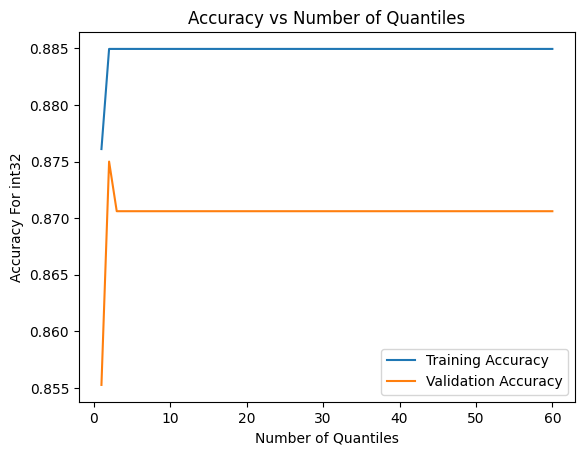

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Define the range of decimals (number of quantiles)
decimal_range = range(1, 61)

# Lists to store training and validation accuracy
train_accuracy_list = []
val_accuracy_list = []
decimal_list = []

for decimals in decimal_range:
    # Apply quantization using np.round
    X_train_quantized = np.round(X_train, decimals=decimals).astype(np.int32)
    X_test_quantized = np.round(X_test, decimals=decimals).astype(np.int32)

    # Create and train the KNN model on the quantized training set
    knn = KNeighborsClassifier()
    knn.fit(X_train_quantized, y_train)

    # Predict labels for the quantized training and validation sets
    y_pred_train = knn.predict(X_train_quantized)
    y_pred_val = knn.predict(X_test_quantized)

    # Calculate the accuracy of the model on the quantized training and validation sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_val)

    # Append accuracy and decimal values to the lists
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    decimal_list.append(decimals)

# Plot the graph
plt.plot(decimal_list, train_accuracy_list, label='Training Accuracy')
plt.plot(decimal_list, val_accuracy_list, label='Validation Accuracy')
plt.xlabel("Number of Quantiles")
plt.ylabel("Accuracy For int32")
plt.title("Accuracy vs Number of Quantiles")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time

data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


# Step 3: Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data: {bit_size} bits")

# Step 4: Apply quantization using KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=32, encode='ordinal', strategy='uniform', dtype=None, subsample=None, random_state=None )
X_quantized = discretizer.fit_transform(X_scaled)

# Convert the quantized data to float32
X_quantized = X_quantized.astype(np.int32)

# Print the bit size of the quantized data
quantized_bit_size = X_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data: {quantized_bit_size} bits")

# Step 5: Split the quantized data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_quantized, y, test_size=0.9, random_state=48)

# Step 6: Train the SVM model and measure the runtime.
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

# Step 7: Predict labels for the test set and calculate the accuracy.
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 8: Print the accuracy and runtime.
print(f"Accuracy after quantization with KbinsDiscretizer: {accuracy:.4f}")
print(f"Runtime after quantization: {runtime:.4f} seconds")


Bit size of the input data: 64 bits
Bit size of the quantized data: 32 bits
Accuracy after quantization with KbinsDiscretizer: 0.9376
Runtime after quantization: 0.0026 seconds


Bit size of the input data: 64 bits


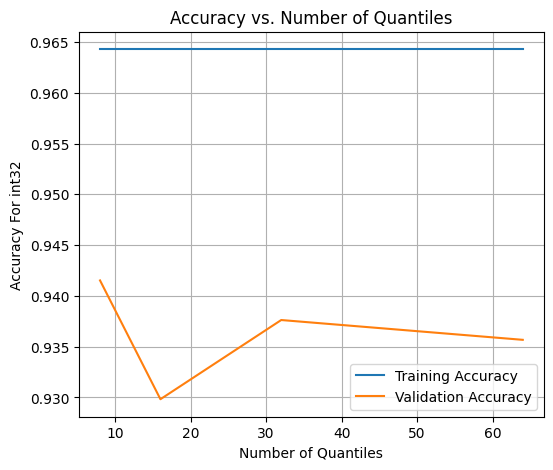

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import matplotlib.pyplot as plt

data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 3: Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data: {bit_size} bits")

# Store the accuracies for different quantiles
train_accuracies = []
val_accuracies = []
quantiles = [8, 16, 32, 64]

for n_quantiles in quantiles:
    # Step 4: Apply quantization using KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_quantiles, encode='ordinal', strategy='uniform', dtype=None, subsample=None, random_state=None)
    X_quantized = discretizer.fit_transform(X_scaled)

    # Convert the quantized data to float32
    X_quantized = X_quantized.astype(np.int32)

    # Print the bit size of the quantized data
    quantized_bit_size = X_quantized.dtype.itemsize * 8
    #print(f"Bit size of the quantized data: {quantized_bit_size} bits")

    # Step 5: Split the quantized data into training and testing sets.
    X_train, X_test, y_train, y_test = train_test_split(X_quantized, y, test_size=0.9, random_state=46)

    # Step 6: Train the SVM model.
    svm = SVC()
    svm.fit(X_train, y_train)

    # Step 7: Predict labels for training and validation sets and calculate the accuracies.
    y_train_pred = svm.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_test_pred = svm.predict(X_test)
    val_accuracy = accuracy_score(y_test, y_test_pred)
    val_accuracies.append(val_accuracy)

# Plotting the graph
plt.figure(figsize=(6, 5))
plt.plot(quantiles, train_accuracies, label='Training Accuracy')
plt.plot(quantiles, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Quantiles')
plt.ylabel('Accuracy For int32')
plt.title('Accuracy vs. Number of Quantiles')
plt.legend()
plt.grid(True)
plt.show()
